# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Léo\Downloads\ciencia de dados\ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
print("Primeiras 10 linhas:")
print(df.head(10))

faltantes = df.isnull().sum()
faltantes_percentual = (faltantes / len(df) * 100).round(2)

# Tratamento dos dados faltantes

for coluna in df.columns:
    if df[coluna].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[coluna]):
            mediana = df[coluna].median()
            df[coluna].fillna(mediana, inplace=True)
            print(f"Coluna '{coluna}': preenchida com mediana ({mediana})")
        else:
            moda = df[coluna].mode()[0]
            df[coluna].fillna(moda, inplace=True)
            print(f"Coluna '{coluna}': preenchida com moda ({moda})")


print("\nDados faltantes após o tratamento:")
print(df.isnull().sum())

Primeiras 10 linhas:
   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   
5            500               380        66          2            1   
6            550               100        48          2            2   
7            600               110        46          2            2   
8            600               100        49          2            2   
9            600               325        50          2            2   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  
5         0        1  
6         1        1  
7 

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.


Estatísticas descritivas:
       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.

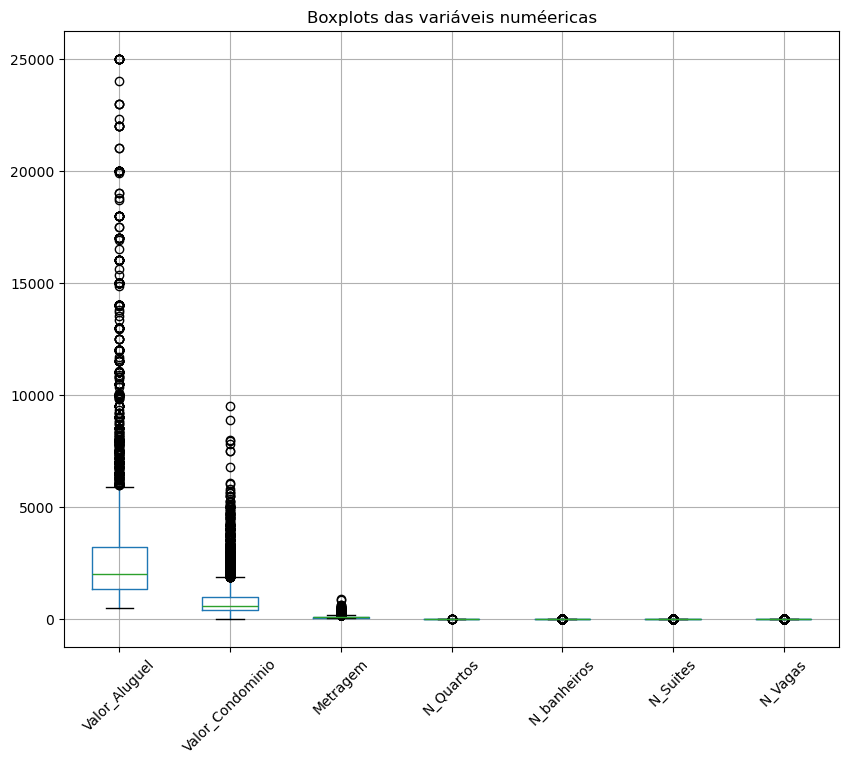


Tamanho original: 7203
Tamanho após remover outliers em Valor_Aluguel: 6454


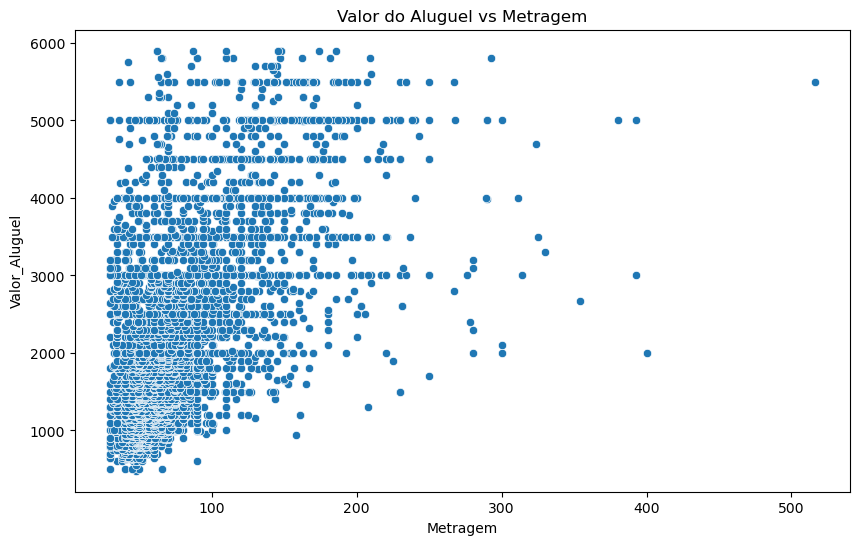

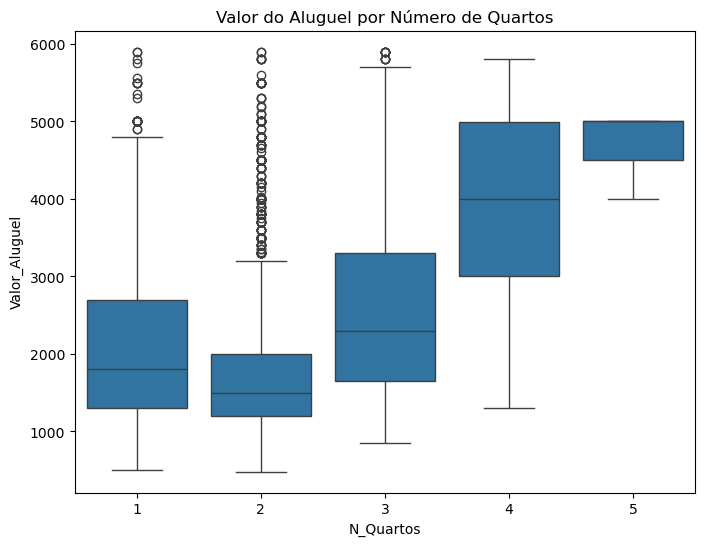

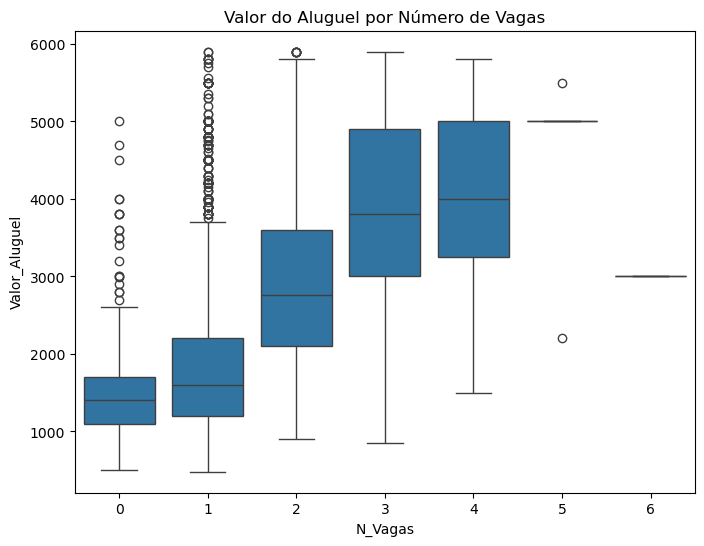

In [4]:
#Estatísticas descritivas e possíveis outliers
print("\nEstatísticas descritivas:")
print(df.describe())

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
df[num_cols].boxplot()
plt.title("Boxplots das variáveis numéericas")
plt.xticks(rotation=45)
plt.show()

#Detecção e tratamento de outliers
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_filtrado 

print(f"\nTamanho original: {len(df)}")
df_sem_outlier = remover_outliers_iqr(df, "Valor_Aluguel")
print(f"Tamanho após remover outliers em Valor_Aluguel: {len(df_sem_outlier)}")

#Valor do aluguel vs metragem
plt.figure(figsize=(10,6))
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df_sem_outlier)
plt.title("Valor do Aluguel vs Metragem")
plt.show()

#Valor do aluguel vs número de quartos
plt.figure(figsize=(8,6))
sns.boxplot(x='N_Quartos', y= 'Valor_Aluguel', data=df_sem_outlier)
plt.title("Valor do Aluguel por Número de Quartos")
plt.show()
#Valor do aluguel vs número de vagas
plt.figure(figsize=(8,6))
sns.boxplot(x='N_Vagas', y='Valor_Aluguel', data=df_sem_outlier)
plt.title("Valor do Aluguel por Número de Vagas")
plt.show()

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




\Matriz de correlsção:
                  Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  \
Valor_Aluguel          1.000000          0.695302  0.730591   0.413139   
Valor_Condominio       0.695302          1.000000  0.805926   0.497420   
Metragem               0.730591          0.805926  1.000000   0.678091   
N_Quartos              0.413139          0.497420  0.678091   1.000000   
N_banheiros            0.603715          0.585795  0.687558   0.553807   
N_Suites               0.614397          0.589244  0.696281   0.540887   
N_Vagas                0.652858          0.690993  0.743872   0.591224   

                  N_banheiros  N_Suites   N_Vagas  
Valor_Aluguel        0.603715  0.614397  0.652858  
Valor_Condominio     0.585795  0.589244  0.690993  
Metragem             0.687558  0.696281  0.743872  
N_Quartos            0.553807  0.540887  0.591224  
N_banheiros          1.000000  0.920149  0.694983  
N_Suites             0.920149  1.000000  0.712054  
N_Vagas             

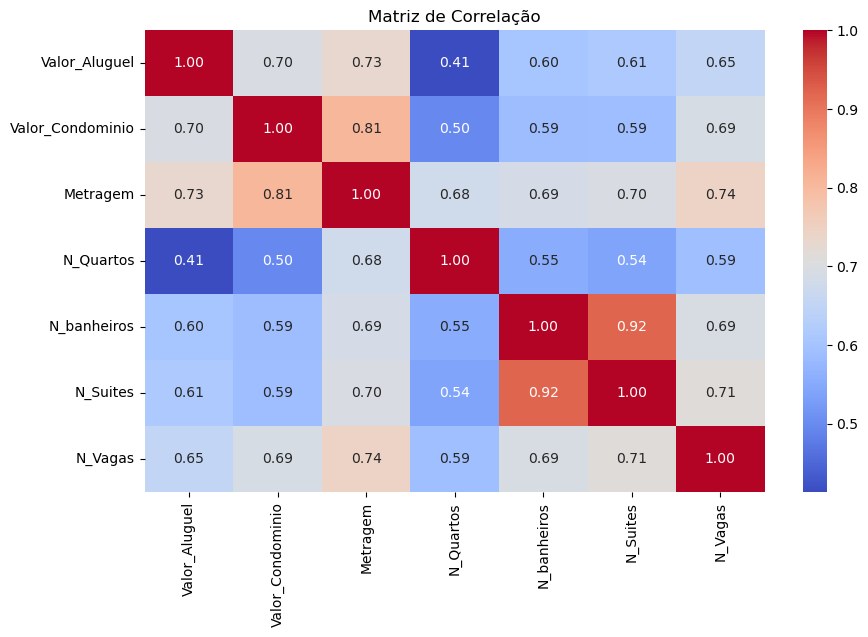


Correlação de cada variável com Valor_Aluguel:
Valor_Aluguel       1.000000
Metragem            0.730591
Valor_Condominio    0.695302
N_Vagas             0.652858
N_Suites            0.614397
N_banheiros         0.603715
N_Quartos           0.413139
Name: Valor_Aluguel, dtype: float64

Variáveis com correlação forte (|r| > 0.5):
Valor_Aluguel       1.000000
Metragem            0.730591
Valor_Condominio    0.695302
N_Vagas             0.652858
N_Suites            0.614397
N_banheiros         0.603715
Name: Valor_Aluguel, dtype: float64


In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

correlacao = num_cols.corr(method='pearson')

print("\Matriz de correlsção:")
print(correlacao)

#Gráfico de calor (Heatmap)

plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm",cbar=True)
plt.title("Matriz de Correlação")
plt.show()

# Identificar variáveis mais correlacionadas com Valor_Aluguel

correlacao_target = correlacao["Valor_Aluguel"].sort_values(ascending=False)
print("\nCorrelação de cada variável com Valor_Aluguel:")
print(correlacao_target)

# Variáveis mais fortes
fortes = correlacao_target[abs(correlacao_target) > 0.5]
print("\nVariáveis com correlação forte (|r| > 0.5):")
print(fortes)


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [6]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)

Shape X_train: (5042, 6)
Shape X_test : (2161, 6)
Shape y_train: (5042,)
Shape y_test : (2161,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [8]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
X_test_simple = X_test[['Metragem']]  # Variável independente
y_test_simple = y_test  

In [9]:
X_train_simple = X_train[['Metragem']] 
y_train_simple = y_train                
X_test_simple = X_test[['Metragem']]    
y_test_simple = y_test                  

modelo = LinearRegression()
modelo.fit(X_train_simple, y_train_simple)

coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Coeficiente (inclinação): {coeficiente:.2f}")
print(f"Intercepto: {intercepto:.2f}")
print(f"Equação: Valor_Aluguel = ({coeficiente:.2f} * Metragem) + ({intercepto:.2f})")


Coeficiente (inclinação): 34.48
Intercepto: -90.46
Equação: Valor_Aluguel = (34.48 * Metragem) + (-90.46)


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

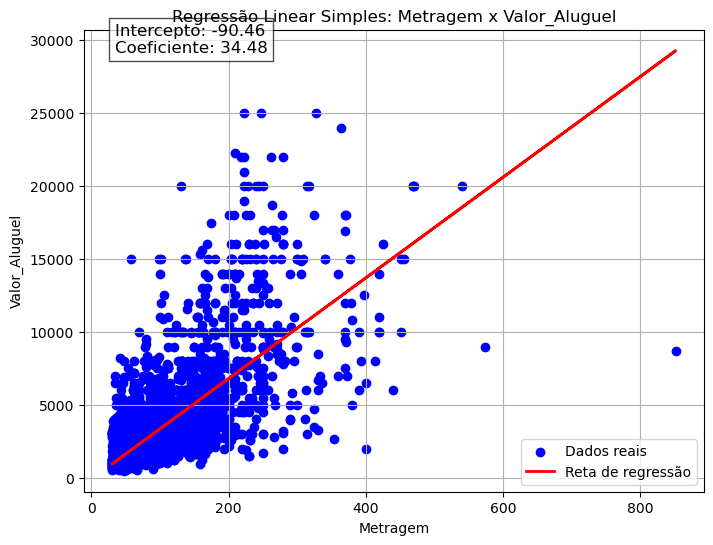

Equação: Valor_Aluguel = (34.48 * Metragem) + (-90.46)


In [10]:
y_pred_train = modelo.predict(X_train_simple)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_simple, y_train_simple, color='blue', label='Dados reais')
plt.plot(X_train_simple, y_pred_train, color='red', linewidth=2, label='Reta de regressão')

plt.text(
    0.05, 0.95,
    f"Intercepto: {intercepto:.2f}\nCoeficiente: {coeficiente:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.xlabel("Metragem")
plt.ylabel("Valor_Aluguel")
plt.title("Regressão Linear Simples: Metragem x Valor_Aluguel")
plt.legend()
plt.grid(True)
plt.show()

print(f"Equação: Valor_Aluguel = ({coeficiente:.2f} * Metragem) + ({intercepto:.2f})")

Nossa equação seria:  R²=0.518

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [11]:
r2_train = modelo.score(X_train_simple, y_train_simple)

print(f"R² no treinamento: {r2_train:.3f}")

if r2_train >= 0.75:
    print("Insight: O modelo apresenta um bom ajuste, explicando a maior parte da variação no valor do aluguel pela metragem.")
elif r2_train >= 0.5:
    print("Insight: O modelo explica parte relevante da variação no valor do aluguel, mas há outros fatores importantes além da metragem.")
else:
    print("Insight: O modelo não apresenta um bom ajuste. A metragem sozinha não é suficiente para explicar o valor do aluguel.")

R² no treinamento: 0.518
Insight: O modelo explica parte relevante da variação no valor do aluguel, mas há outros fatores importantes além da metragem.


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

c:\Users\Léo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


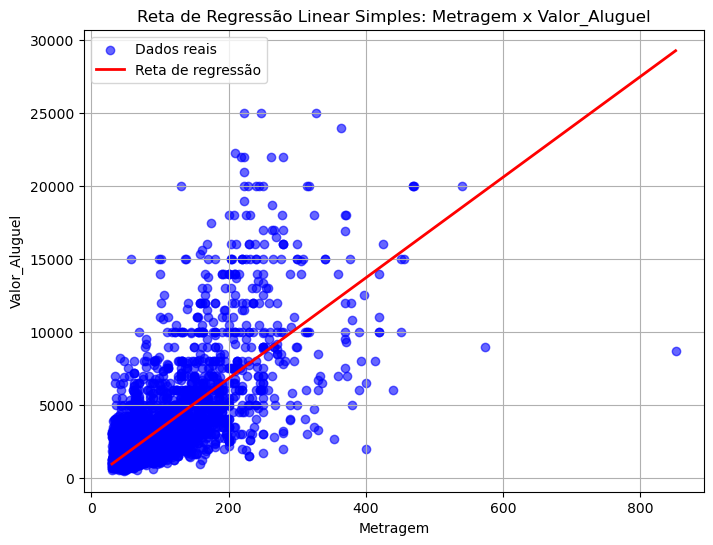

Insight:
 Observa-se que a reta acompanha a tendência geral de aumento do valor do aluguel com a metragem.
 Há dispersão considerável dos pontos em relação à reta, indicando que outros fatores além da metragem influenciam fortemente o preço.
 Isso é consistente com o R² (~0.52), que mostra que apenas cerca de metade da variação no aluguel é explicada pela metragem.


In [12]:
X_linha = np.linspace(X_train_simple.min(), X_train_simple.max(), 100).reshape(-1, 1)
y_linha = modelo.predict(X_linha)

# Plotar gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X_train_simple, y_train_simple, color='blue', alpha=0.6, label='Dados reais')
plt.plot(X_linha, y_linha, color='red', linewidth=2, label='Reta de regressão')

plt.xlabel("Metragem")
plt.ylabel("Valor_Aluguel")
plt.title("Reta de Regressão Linear Simples: Metragem x Valor_Aluguel")
plt.legend()
plt.grid(True)
plt.show()

# Insight sobre a dispersão
print("Insight:")
print(" Observa-se que a reta acompanha a tendência geral de aumento do valor do aluguel com a metragem.")
print(" Há dispersão considerável dos pontos em relação à reta, indicando que outros fatores além da metragem influenciam fortemente o preço.")
print(" Isso é consistente com o R² (~0.52), que mostra que apenas cerca de metade da variação no aluguel é explicada pela metragem.")

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [13]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [14]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test_simple)

# Avaliando o desempenho do modelo usando métricas como o R²
r2_teste = modelo.score(X_test_simple, y_test_simple)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", round(r2_teste, 3))

if r2_teste >= 0.75:
    print("Insight: O modelo teve um bom desempenho na base de teste.")
elif r2_teste >= 0.5:
    print("Insight: O modelo teve um desempenho razoável na base de teste, mas ainda há espaço para melhorias.")
else:
    print("Insight: O modelo teve baixo desempenho na base de teste, indicando que a metragem sozinha não é suficiente.")

Coeficiente de Determinação (R²) nos Dados de Teste: 0.567
Insight: O modelo teve um desempenho razoável na base de teste, mas ainda há espaço para melhorias.


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

    A diferença entre eles é bem pequena,o que significa que o modelo generaliza razoavelmente bem e não apresenta sinais claros de superajuste.
    Porém, como ambos os valores estão próximos de 0.5, a metragem sozinha explica apenas parte do valor do aluguel;outros fatores (como localização, número de quartos, qualidade do imóvel etc.) também influenciam bastante.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [15]:
X = df.drop('Valor_Aluguel', axis=1) 
y = df['Valor_Aluguel']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5042, 6)
X_test shape: (2161, 6)
y_train shape: (5042,)
y_test shape: (2161,)


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [16]:
modelo_multiplo = LinearRegression()

modelo_multiplo.fit(X_train, y_train)

print("Intercepto:", modelo_multiplo.intercept_)
print("Coeficientes:", modelo_multiplo.coef_)

Intercepto: 443.5006947476477
Coeficientes: [   0.78143424   20.38661822 -669.24252648  228.19886988  346.6520457
  544.42226498]


C) Traga o valor do R quadrado e avalie o valor encontrado.

In [17]:
r2_train = modelo.score(X_train_simple, y_train_simple)
print(f"R² no treinamento: {r2_train:.3f}")

r2_teste = modelo.score(X_test_simple, y_test_simple)
print(f"R² no teste: {r2_teste:.3f}")

# Avaliação
if r2_train >= 0.75:
    print("Insight: O modelo apresenta um bom ajuste no treino, explicando a maior parte da variação no aluguel pela metragem.")
elif r2_train >= 0.5:
    print("Insight: O modelo explica parte relevante da variação no aluguel no treino, mas há outros fatores importantes.")
else:
    print("Insight: O modelo não apresenta um bom ajuste no treino; a metragem sozinha não é suficiente.")

if r2_teste >= 0.75:
    print("Insight: O modelo teve bom desempenho na base de teste.")
elif r2_teste >= 0.5:
    print("Insight: O modelo teve desempenho razoável na base de teste, mas há espaço para melhorias.")
else:
    print("Insight: O modelo teve baixo desempenho na base de teste, reforçando que a metragem sozinha não é suficiente.")

R² no treinamento: 0.518
R² no teste: 0.567
Insight: O modelo explica parte relevante da variação no aluguel no treino, mas há outros fatores importantes.
Insight: O modelo teve desempenho razoável na base de teste, mas há espaço para melhorias.


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [18]:
previsoes = modelo.predict(X_test_simple)

r2_teste = modelo.score(X_test_simple, y_test_simple)
print(f"R² no teste: {r2_teste:.3f}")

if r2_teste >= 0.75:
    print("Insight: O modelo teve bom desempenho na base de teste.")
elif r2_teste >= 0.5:
    print("Insight: O modelo teve desempenho razoável na base de teste, mas ainda há outros fatores importantes.")
else:
    print("Insight: O modelo teve baixo desempenho na base de teste, indicando que a metragem sozinha não é suficiente.")

R² no teste: 0.567
Insight: O modelo teve desempenho razoável na base de teste, mas ainda há outros fatores importantes.


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

    O múltiplo é melhor porque usa mais variáveis relevantes, explicando mais do valor do aluguel.
    Mais informações melhor ajuste. A metragem sozinha não captura tudo; número de quartos, vagas, suítes e valor do condomínio também influenciam.